In [1]:
import csv
import torch
import torch.nn as nn
import torch.distributions as Dist
torch.set_default_tensor_type("torch.DoubleTensor")
import numpy as np
import pickle
import pandas as pd
import cvxpy as cp
import math
from multiprocessing import Pool
import multiprocessing as mp
import matplotlib.pyplot as plt

In [83]:
lam_true = 4
torch.manual_seed(42)
samp = Dist.Exponential(lam_true)
sz = 10000000
torch.manual_seed(42)
ys = samp.sample(sample_shape=torch.Size([sz]))

In [84]:
print(ys.max())

tensor(3.6940)


In [109]:
Ns=500
a = np.zeros(Ns,)
mus = np.zeros(Ns,)
for i in range(Ns):
    idx = np.random.randint(low=0, high=sz, size=5000)
    data = np.exp(ys[idx])
    a[i] = data.max()
    mus[i] = np.log(data.mean())


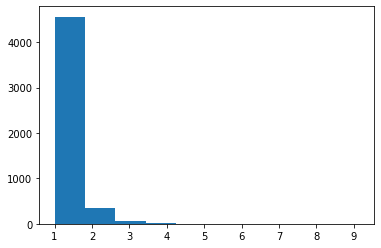

In [110]:
_=plt.hist(data.numpy())

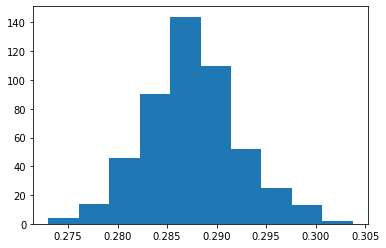

In [111]:
_=plt.hist(mus)

In [112]:
print(ys.mean())

tensor(0.2499)


In [ ]:
plt.hist?

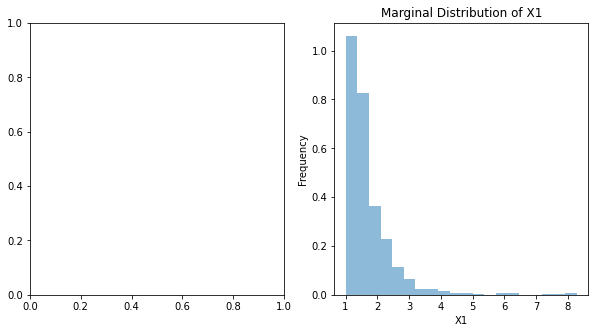

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D exponential data with rate parameters (lambda_1, lambda_2)
N = 1000
lambda_1 = 4
lambda_2 = 5
X = np.zeros((N, 2))
U = np.random.uniform(size=(N, 2))
X[:, 0] = -np.log(1 - U[:, 0]) / lambda_1
X[:, 1] = -np.log(1 - U[:, 1]) / lambda_2

# Plot the points and the histograms of the marginals
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))


ax[1].hist(np.exp(X[:, 0]+X[:,1]), bins=20, alpha=0.5, density=True)
ax[1].set_xlabel('X1')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Marginal Distribution of X1')

plt.show()